# How to use the Spectrum objects

SpecpolFlow provides a python class that holds a <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object. 

In this tutorial, we demonstrate the capabilities of this class. 

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object contains the following data arrays:

* wl - wavelengths
* specI - Stokes I spectrum
* specV - polarized spectrum, usually Stokes V
* specN1 - the first polarimetric null spectrum
* specN2 - the second polarimetric null spectrum
* specSig - the formal uncertainties, which apply to the all spectra.
* header - the text in the header of a .s file

You will need to load the following packages

In [1]:
import specpolFlow as pol
import matplotlib.pyplot as plt
import numpy as np

In this tutorial, we use the UPENA normalized spectrum ([IndividualLine_tutorialfiles/1423137pn.s](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/Tutorials/IndividualLine_tutorialfiles/1423137pn.s)) of the active cool star BP Tau.

## How to load and save a Spectrum from a '.s' file

::::{margin}
:::{note}
The <a href='../API/Spectrum_API.html#specpolFlow.read_spectrum'>`read_spectrum`</a> has a few optional advanced keywords that can be used to automatically reject some types of bad data (e.g. negative flux values), and to order the datapoints in order of wavelengths -- see the API for details. 
:::
::::
To load in a spectrum in .s format, we can use the <a href='../API/Spectrum_API.html#specpolFlow.read_spectrum'>`read_spectrum`</a> function. 

Text(0, 0.5, 'Normalized Stokes I')

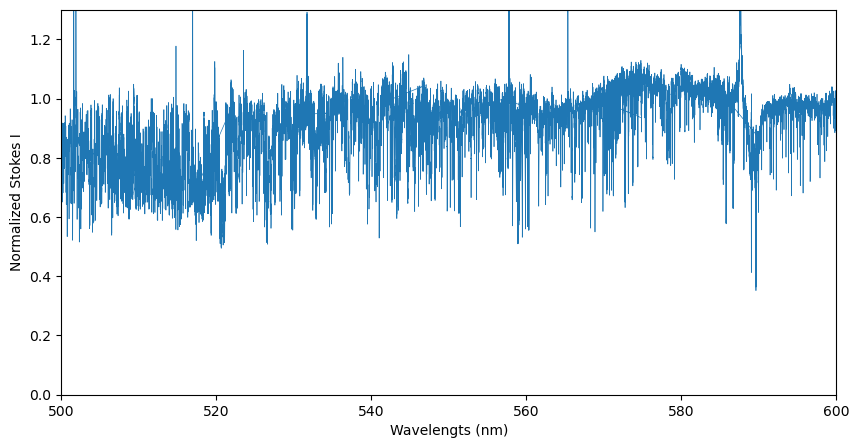

In [17]:
spec = pol.read_spectrum('IndividualLine_tutorialfiles/1423137pn.s')

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(spec.wl, spec.specI, lw = 0.5)
ax.set_ylim(0,1.3)
ax.set_xlim(500,600)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')

If the '.s' file had a text header, it will be available from the `header` property of the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object:

In [18]:
print(spec.header)

None


As you can see here, since the file did not have a header, the `spec.header` is set to `None`

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object can be saved in a '.s' format with the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.save'>`spectrum.save`</a> class function.

In the example below, we will add a header to the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object, and save. 

In [19]:
spec.header = 'Spectrum for star BP Tau'

spec.save('Output/Spectrum.s', saveHeader = True)
# saveHeader = True is the default. 
# If you would like to skip the '.s' 2-line header, set to False

:::{note}
The <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> class supports 3 types of '.s' file format
* Polarimetric spectrum with 6 columns
* Spectroscopic spectrum with 3 columns (Wavelength, Flux, uncertainty): in this case the spectrum.specV, spectrum.N1, spectrum.N2 will be set to zero
* Spectroscopic spectum with 2 columns (Wavelength, Flux): in this case spectrum.specSig, spectrum.specV, spectrum.N1, spectrum.N2 will be set to zero. 

The <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.save'>`spectrum.save`</a> function will save the spectrum in a 2, 3, or 5 columns format, if it detects columns that are strickly filled with zeros. 
:::

## How to use indexing and concatenation

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object can be sliced and indexed using python normal list indexation.

In [20]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")

print('The spectrum has {} datapoints'.format(len(spec)))

print('The maximum wavelength is {} nm'.format(spec.wl[-1]))

cut_spectrum = spec[spec.wl>600]
print(cut_spectrum[0].wl)

The spectrum has 213542 datapoints
The maximum wavelength is 1048.0382 nm
600.0012


Here's a slighly more advanced example that illustrates how one can assign a <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object to a slice of another <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object. Here, we replace a section of the spectrm with ones for the intensity and zeros for the polarization. Of course, it is also possible to assigned arrays of zeros and ones to each individual arrays of `spec`. 
````
spec.specI[0:1500] = 1.0
spec.specV[0:1500] = 0.0
...
````

Text(0, 0.5, 'Normalized Stokes I')

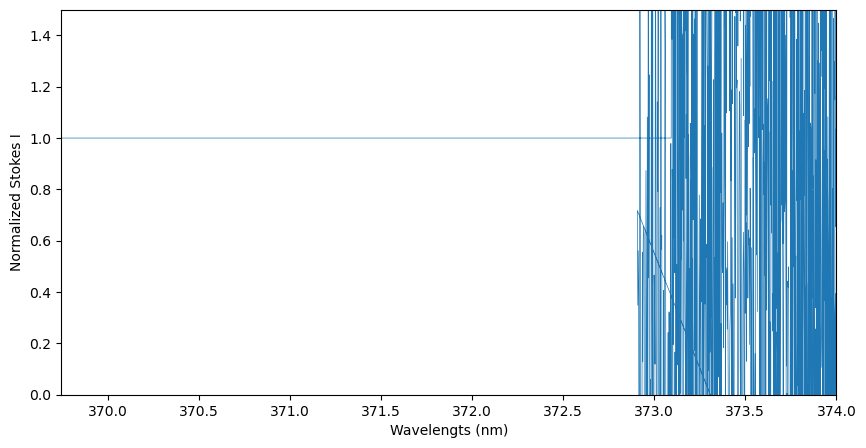

In [22]:
# Create a spectrum object with 1500 datapoints
n = 1500
replace = pol.Spectrum(spec.wl[0:n], np.ones(n), # wl and specI
                       np.zeros(n), np.zeros(n), np.zeros(n), # specV, specN1, and specN2
                       np.ones(n)) # specSig

spec[0:n] = replace

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(spec.wl, spec.specI, lw = 0.5)
ax.set_ylim(0,1.5)
ax.set_xlim(min(spec.wl),374)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')

We can also concatenate mutiple <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object using the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.contatenate'>`Spectrum.concatenate`</a> class function. 

In the example below, we create two new <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> objects by slicing `spec`, and we then concatenate them together

Text(0, 0.5, 'Normalized Stokes I')

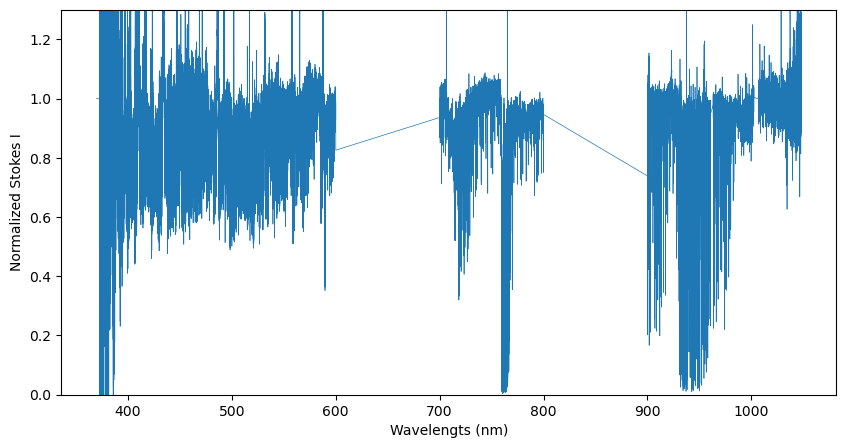

In [23]:
spec1 = spec[spec.wl<600]
spec2 = spec[np.logical_and(spec.wl>700,spec.wl<800)]
spec3 = spec[spec.wl>900]

spec_cat = spec1.concatenate([spec2,spec3])

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(spec_cat.wl, spec_cat.specI, lw = 0.5)
ax.set_ylim(0,1.3)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')

## How to extract and merge spectral orders for echelle spectra

Some spectra will contain over-overlaps (wavelength regions that were recorded twice by an echelle spectropolarimeter -- in .s format, the wavelength column goes backward at the edges of the overlaps). 

In the figure below, we illustrate these overlap regions by color-coding the different spectral order.

Text(0, 0.5, 'Normalized Stokes I')

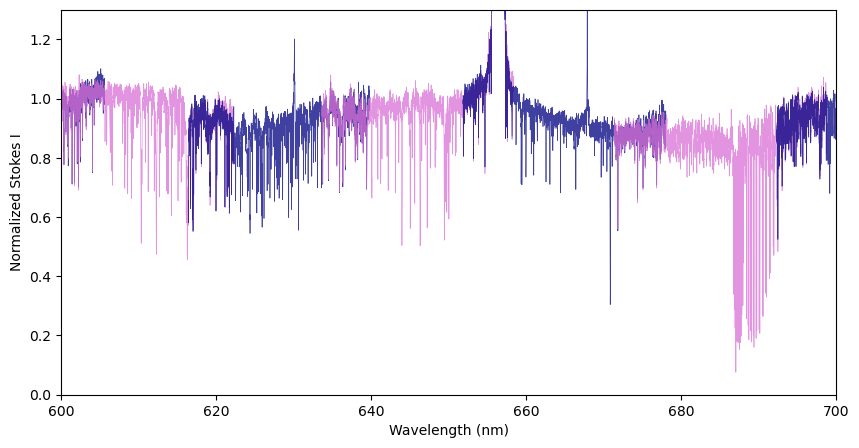

In [30]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")

order_color=['orchid','navy']
orders = spec.get_orders()

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
for i, o in enumerate(orders):
    ax.plot(o.wl, o.specI, lw = 0.5, c=order_color[i % 2], alpha=0.75)
ax.set_ylim(0,1.3)
ax.set_xlim(600,700)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Stokes I')

In the example below, we will use methods to deal with all of the order overlaps all at once. 

:::{tip}
If you are interested in a specific spectral line and need to consider the order merging process more carefully, have a look at the [](7-IndividualLine_Tutorial.ipynb) tutorial. 
:::

We here use the 'trim' method, which keeps a fraction of the overlap in each adjacent order, with the proportion set according to the 'midpoint' keyword. 

Text(0, 0.5, 'Normalized Stokes I')

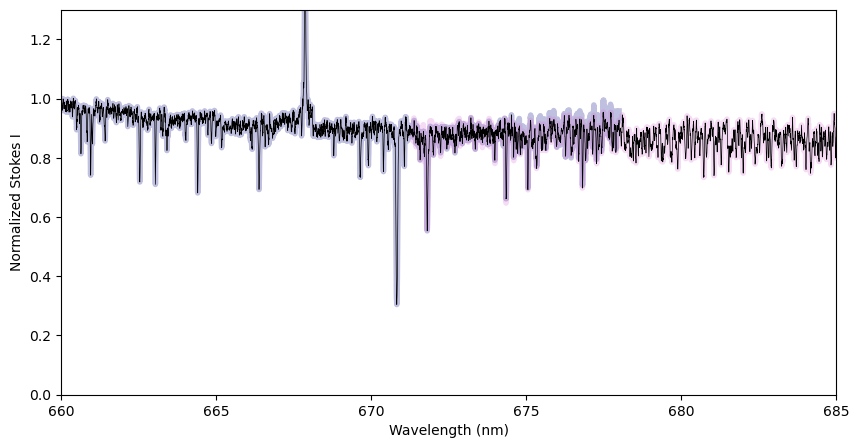

In [39]:
# Using the Spectrum class function to create a Spectrum object 
# with the overlap merged trimmed in the middle of the overlap
spec_merged = spec.merge_orders(mode='trim', midpoint=0.5)

#If you'd like to save the result to a file, you can use the save class-function
# spec_merged.save('spectrum_merged.s')

# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
for i, o in enumerate(orders):
    ax.plot(o.wl, o.specI, lw = 4, c=order_color[i % 2], alpha=0.25)
ax.plot(spec_merged.wl, spec_merged.specI, lw = 0.5, c='k')
ax.set_ylim(0,1.3)
ax.set_xlim(660,685)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Stokes I')

## How to coadd multiple spectra

If you have multiple spectra that you would like to average together, for example a long ESPaDOnS observation that was split into multiple sequences to respect the integration length limit.

:::{warning}
Using this function with spectra that contains order overlap will not result in correct results. Make sure that you have cut or merged the order overlaps first (see previous section). 
:::

For this example, we will use 3 observations of the B-type star HD 46328
* [hd46328_test_1.s](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_1.s)
* [hd46328_test_2.s](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_2.s)
* [hd46328_test_3.s](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_3.s)

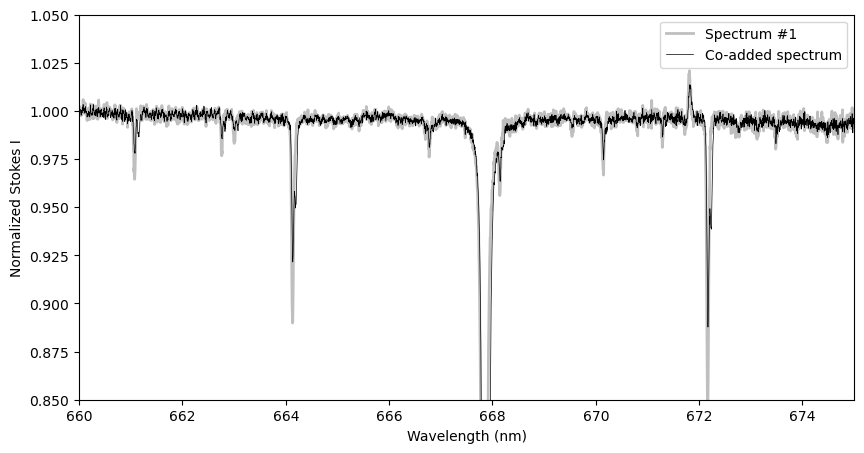

In [62]:
# Reading the spectra and merging the order overlaps with default settings
spec1 = pol.read_spectrum('../GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_1.s').merge_orders()
spec2 = pol.read_spectrum('../GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_2.s').merge_orders()
spec3 = pol.read_spectrum('../GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_3.s').merge_orders()

# The coadd class-function might return an error if the uncertainty in the
# spectra are zero or negative (because of the weighting)
# Here, remove these 'bad pixels' by setting the uncertainty to infinity
# (so they will not contribute to the weigthed average)
spec1.specSig[spec1.specSig <= 0] = np.inf
spec2.specSig[spec2.specSig <= 0] = np.inf
spec3.specSig[spec3.specSig <= 0] = np.inf

# co-adding the 3 spectra together 
# (interpolating on the wavelength grid of the first spectrum)
spec_coadd = spec1.coadd([spec2, spec3])


# Make a figure of Stokes I
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(spec1.wl, spec1.specI, lw=2, c='0.75', label='Spectrum #1')
ax.plot(spec_coadd.wl, spec_coadd.specI, lw = 0.5, c='k', label='Co-added spectrum')
ax.set_ylim(0.85,1.05)
ax.set_xlim(660,675)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Stokes I')
ax.legend()